<a href="https://colab.research.google.com/github/cuamatzivillalobosdiego-design/Investigaci-n-de-operaciones-1/blob/main/Dibujo_de_redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dibujo de redes

4

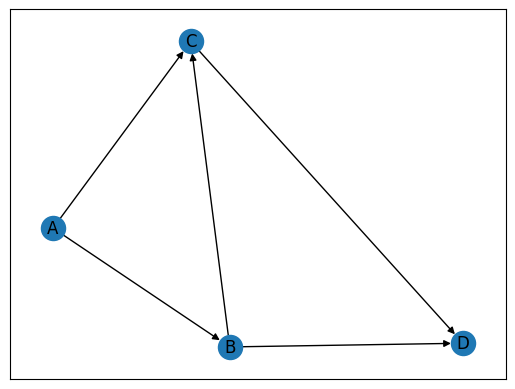

In [ ]:
import networkx as nx
G=nx.DiGraph() #grafo dirigido
G.add_edge("A","B",capacity=1) #agregar los arcos
G.add_edge("B","D",capacity=2)
G.add_edge("C","D",capacity=1)
G.add_edge("A","C",capacity=1)
G.add_edge("B","C",capacity=2)
G
nx.draw_networkx(G)
nx.nodes(G) #lista de nodos de la red
nx.edges(G)
nx.number_of_nodes(G) #numero de nodos

## $Libreria Networkx$
NetworkX es una librería de Python diseñada para la creación, manipulación y estudio de grafos.
Un grafo es una estructura matemática compuesta por nodos (o vértices) y aristas (o enlaces) que representan relaciones o conexiones entre elementos.

Se utiliza en muchos campos:

*   Redes sociales (conexiones entre personas).
*   Biología (interacciones entre proteínas).
*   Telecomunicaciones (rutas de comunicación).
*   Análisis de transporte (mapas de carreteras, vuelos).
*   Ciencia de datos y algoritmos de grafos.

##Funciones importantes de Networkx

Creacion de grafos:

*   Grafos no dirigidos: Graph()
*   Grafos dirigidos: DiGraph()
*   Cnjunto de grafos: MultiGraph() o MultiDiGraph()

Agregar nodos y enlaces:

*   Agregar nodos y enlaces uno a uno: add_node() y add_edge()
*   Agregar desde una lista: add_nodes_from() y add_edges_from()
*   Desde un archivo o DataFrame: from_pandas_edgelisd()
*   Para grafos ponderados: add_weighted_edges_from()

Informacion del grafo:

*   Numero de nodos y enlaces del grafo: number_of_nodes() y number_of_edges()
*   Acceder a la metainformacion de nodos y ejes: nodes() y edges()

Vecinos y grado:

*   Identificar vecinos y grados de un nodo: neighbors() y degree()
*   Para redes dirigidas: in_degree() y out_degree()

Centralidad:

*   Centralidad de grado: degree_centrality()
*   Centralidad de intermediacion: betweenness_centrality()
*   Centralidad entre los nodos: closeness_centrality()

Componentes conectadas:

*   Componentes conectadas de un grafo: connected_components()

Algoritmos de optimizacion:

*   El camino mas corto:  shortest_path()
*   Flujo maximo: dijkstra_path()

Subgrafo:

*   Genera un subgrafo de un grafo: subgraph()

Operaciones de conjuntos:

*   Union: union()
*   Interseccion: intersection()
*   Diferencia: difference()

Matriz de adyacencia:

*   Matriz de adyacencia de un grafo: nx.adjacency_matrix(), para verla en pantalla se utiliza to_dense() de numpy

Grafico de grafos:

*   Dibuja grafos: draw()









































$Grafo$ $no$ $dirigido$

Graph with 5 nodes and 8 edges


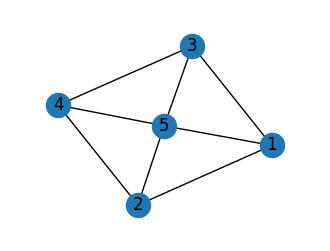

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
Q=nx.Graph() #grafo no dirigido
Q.add_edges_from([(1, 2), (1, 3), (2,5),(3,4),(3,5),(4,2),(4,5),(5,1)]) #Se agregan los arcos, los numeros entre parentesis indican los nodos que se conectan
fig, ax = plt.subplots(figsize=(4, 3)) #Le da tamaño al cuadro blanco del grafo
nx.draw(Q, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()]) #Le da tamaño a el grafo
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(Q)

Matriz adyacente de un grafo no dirigido, esta matriz siempre va a ser simetrica, las filas y columnas funcionan como coordenadas, osea que para la matriz A_i,j se le va a asignar un 1 si hay una arco entre el nodo i y el nodo j, y cero en otro caso.

In [ ]:
adjM = nx.adjacency_matrix(Q) # Se convierte la matriz de formato sparse a dense para poder imprimirla
adjM = adjM.todense()
adjM

array([[0, 1, 1, 1, 0],
       [1, 0, 0, 1, 1],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 1],
       [0, 1, 1, 1, 0]])

DiGraph with 5 nodes and 8 edges


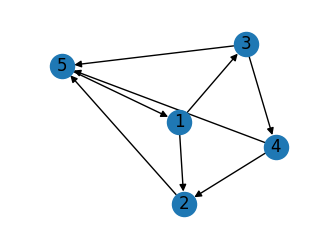

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt
W=nx.DiGraph() #grafo dirigido
W.add_edges_from([(1, 2), (1, 3), (2,5),(3,4),(3,5),(4,2),(4,5),(5,1)])#Al agregar los arcos el primer numero es de donde sale y el segundo es hacia donde se dirige
fig, ax = plt.subplots(figsize=(4, 3))
nx.draw(W, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(W)

La matriz adyacente de un grafo no dirigido no es simetrica y nos da informacion de la direccion de los arcos. En la matriz A_i,j se escribe uno si existe un arco ditigido de i hacia j, y 0 si no existe.

*Duda sobre como acomodar los nodos en la matriz*

In [ ]:
adjM = nx.adjacency_matrix(W) # Se convierte la matriz de formato sparse a dense para poder imprimirla
adjM = adjM.todense()
adjM


array([[0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0]])

Matriz de distancia, es la matriz ayacente de orden dos, esta nos muestra los pares de nodos que estan conectados con un nodo intermedio y la cantidad de caminos para llegar de un nodo a otro.

In [ ]:
distancias_orden_dos = adjM @ adjM # Multiplicación de la matriz por sí misma de forma matricial
distancias_orden_dos

array([[0, 0, 0, 2, 1],
       [1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0],
       [0, 1, 1, 0, 0],
       [1, 0, 0, 1, 0]])

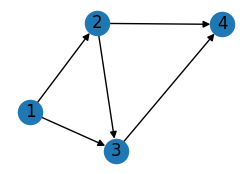

In [ ]:
import networkx as nx
import matplotlib.pyplot as pl
import pandas as pd
conexiones=pd.DataFrame(
    {"in":["1","1","2","2","3"],
     "out":["2","3","3","4","4"]})
R = nx.from_pandas_edgelist(
    conexiones,
    source = "in",
    target = "out",
    create_using = nx.DiGraph
)
fig, ax = plt.subplots(figsize=(3,2))
nx.draw(R, with_labels=True, ax=ax)

In [ ]:
adjM = nx.adjacency_matrix(R)
# Se convierte la matriz de formato sparse a dense para poder imprimirla
adjM = adjM.todense()
adjM

array([[0, 1, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

In [ ]:
# Multiplicación de la matriz por sí misma de forma matricial
distancias_orden_dos = adjM @ adjM
distancias_orden_dos

array([[0, 0, 1, 2],
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
H=nx.Graph() #grafo no dirigido
H.add_weighted_edges_from(
    [
        ("O", "A", 2),
        ("O", "B", 5),
        ("O", "C", 4),
        ("A", "B", 2),
        ("A", "D", 7),
        ("B", "C", 1),
        ("B", "D", 4),
        ("B", "E", 3),
        ("C", "E", 4),
        ("D", "E", 1),
        ("D", "T", 5),
        ("E", "T", 7),
    ])

In [ ]:
# Se muestra el peso de cada eje, así como los nodos que conecta
[a for a in H.edges(data=True)]

[('O', 'A', {'weight': 2}),
 ('O', 'B', {'weight': 5}),
 ('O', 'C', {'weight': 4}),
 ('A', 'B', {'weight': 2}),
 ('A', 'D', {'weight': 7}),
 ('B', 'C', {'weight': 1}),
 ('B', 'D', {'weight': 4}),
 ('B', 'E', {'weight': 3}),
 ('C', 'E', {'weight': 4}),
 ('D', 'E', {'weight': 1}),
 ('D', 'T', {'weight': 5}),
 ('E', 'T', {'weight': 7})]

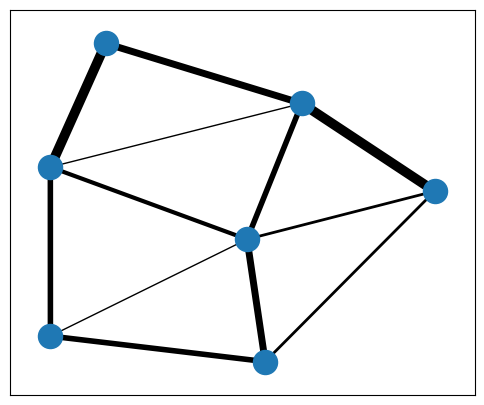

In [ ]:
weights = [a[2]["weight"] for a in H.edges(data=True)]
# Definir la posición de los nodos utilizando un layout
pos = nx.spring_layout(H)

# Representar nodos y ejes
fig, ax = plt.subplots(figsize=(6,5))
nx.draw_networkx_nodes(H, pos = pos, ax = ax)
nx.draw_networkx_edges(H, pos = pos, edgelist = H.edges, width = weights, ax = ax);